## python 패키지 불러오기
---

In [2]:
# 데이터 구성 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats

# 선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


%matplotlib inline

In [3]:
# matplotlib 패키지 한글 깨침 처리
matplotlib.rc('font', family = 'AppleGothic')
plt.rc('font', family = 'AppleGothic')

# 1. 상관분석
---

## ▪️ 상관분석
- 두 수량형 변수간에 선형적 관계와 강도와 방향을 분석하는 통계방법
- 한 변수가 증가할 때 다른 한 변수가 선형적인 증가 또는 감소하는 지를 나타낸 것

## ▪️ 선형관계의 척도
### 1) 공분산 (covarience)
- **둘 이상의 변량이 연관성을 가지며 분포하는 모양을 전체적으로 나타낸 분산**
    - 두 변수가 <u>동일한 방향?</u> 공분산은 크고 <u>양의 값</u>을 가짐
    - 두 변수가 <u>반대 방향?</u> 공분산은 크고 <u>음의 값</u>을 가짐

### 2) 상관계수 (coefficient of correlation)
- **두 변수 간의 선형적인 관계 정도와 방향을 수치로 표시한 표준화된 지수**

## ▪️ 상관계수의 특성
- 상관계수의 범위 : -1 <= r <= +1
- 한 변수 또는 두 변수의 값에 0이 아닌 일정한 수를 더하거나 곱해도 상관계수 변하지 않음
- 변수 척도의 단위에 영향 받지 않음
- <u>상관계수는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하지는 않음</u>

## ▪️ 산점도와 상관분석
- **산점도 : 두 변수 X,Y의 관측치를 좌표평면상에 점으로 나타낸 그림**
- 산점도 분석시
    - 1) 점들의 산재된 모양으로부터 두 변수 사이 관계 여부 확인
    - 2) 직선 관계? 곡선 관계? 확인
    - 3) 이상 데이터 확인
    - 4) 점들이 몇 개의 집단으로 층별되는지 확인

<br>

# 2. 연습 및 실습 (상관분석)
---

## [연습1]
- 부품수리시간과 부품 수간 관계 분석

In [4]:
# 데이터 불러오기
df = pd.read_csv("../data/작업시간.csv", engine="python")
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

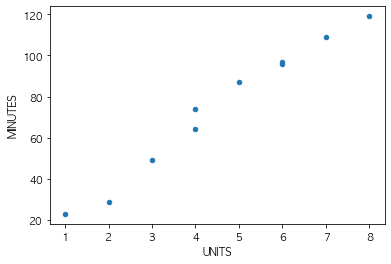

In [5]:
# 데이터 시각화
df.plot.scatter(x="UNITS", y="MINUTES")

In [6]:
# correlation analysis 실행
corr, pval = stats.pearsonr(df['UNITS'], df['MINUTES'])

# coreelation, p-value 결과 출력
print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:0.989
p-value:0.000


In [7]:
# 목표변수와 설명번수의 상관분석
df.corr(method="pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


- corr값이 0.989로 부품수리시간과 부품수 간에 '매우 강한 상관성'이 있다고 할 수 있다.

## [실습1]
- 초코칩의 강도와 재료 반죽온도간에 관계 분석

In [8]:
# 데이터 불러오기
df = pd.read_csv("../data/correlation.csv", engine="python")
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


<AxesSubplot:xlabel='strength', ylabel='temp'>

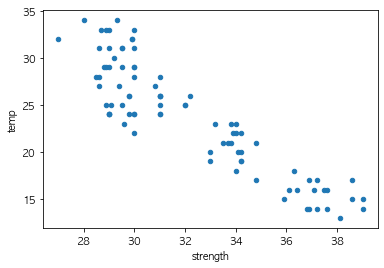

In [9]:
# 데이터 시각화
df.plot.scatter(x="strength", y="temp")

In [10]:
# correlation analysis 실행
corr, pval = stats.pearsonr(df['strength'], df['temp'])

# correlation, p-value 결과 출력
print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:-0.899
p-value:0.000


In [11]:
# 목표변수와 설명번수의 상관분석
df.corr(method="pearson").round(3)

,strength,temp,Quantity,b_time,Oven_TMP
strength,1.000,-0.899,0.703,0.966,0.037
temp,-0.899,1.000,-0.639,-0.873,-0.064
Quantity,0.703,-0.639,1.000,0.690,-0.151
b_time,0.966,-0.873,0.690,1.000,0.099
Oven_TMP,0.037,-0.064,-0.151,0.099,1.000


- corr값이 -0.899로 초코칩의 강도와 재료 반죽 온도간에 '강한 음의 상관성'이 있다고 할 수 있다.